In [1]:
 # importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# importing Deep leaning Libraries

import keras
from keras.models import Sequential

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten




In [2]:
# importing Data
x_train=np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Deep_Learning/DATA/Image Classification/input.csv",delimiter=",")
y_train=np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Deep_Learning/DATA/Image Classification/labels.csv",delimiter=",")

x_test=np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Deep_Learning/DATA/Image Classification/input_test.csv",delimiter=",")
y_test=np.loadtxt(r"/content/drive/MyDrive/Colab Notebooks/Deep_Learning/DATA/Image Classification/labels_test.csv",delimiter=",")


In [3]:
# checking dimesnions of each data set
print(f" x_train: {x_train.shape}\n y_train:{y_train.shape}\n x_test: {x_test.shape}\n y_test:{y_test.shape}")

 x_train: (2000, 30000)
 y_train:(2000,)
 x_test: (400, 30000)
 y_test:(400,)


In [4]:
#Analysing Pixel Values

print("maximum pixel value",x_train.max())
print("minimum pixel value",x_train.min())

maximum pixel value 255.0
minimum pixel value 0.0


Given the pixel values being ranged from 0 to 255 , the images can be an RGB image.


Given the  columns of an imgae is 30000, the size can be 100px X 100px
and RGB having 3 layers
30000 values can be given as 100px X 100px X 3
so,
Let's reshape our image as per the rgb Layers

In [5]:
#Trainig data
x_train=x_train.reshape(len(x_train),100, 100,3)
y_train=y_train.reshape(len(y_train),1)

# test Data
x_test=x_test.reshape(len(x_test),100, 100,3)
y_test=y_test.reshape(len(y_test),1)

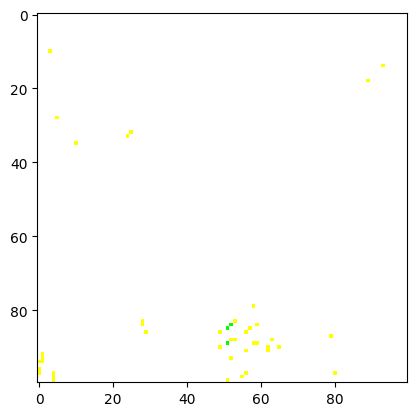

In [6]:
plt.imshow(x_train[0])


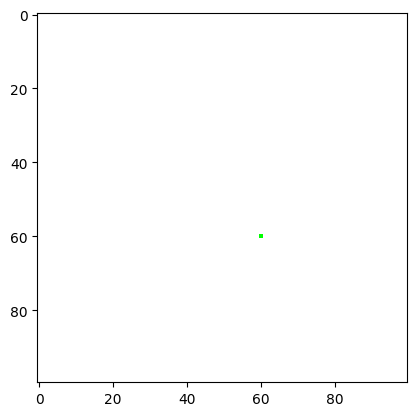

In [7]:
plt.imshow(x_train[1])


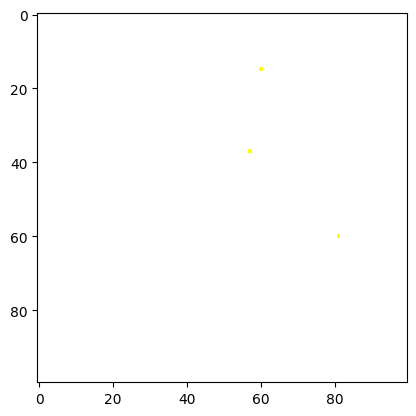

In [8]:
plt.imshow(x_test[2])

*Images seems to be pretty scattered, which is why we need to scale the pixel values, This will also improve processing process. *

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
#Analysing Pixel Values

print("maximum pixel value",x_train.max())
print("minimum pixel value",x_train.min())

maximum pixel value 1.0
minimum pixel value 0.0


In [11]:
# checking dimesnions of each data set
print(f" x_train: {x_train.shape}\n y_train:{y_train.shape}\n x_test: {x_test.shape}\n y_test:{y_test.shape}")

 x_train: (2000, 100, 100, 3)
 y_train:(2000, 1)
 x_test: (400, 100, 100, 3)
 y_test:(400, 1)


In [12]:
# buliding a function to show random image
import random
def show_img(x,y):
  img_no=random.randint(0,len(y))
  plt.imshow(x[img_no])
  print()
  if y[img_no]==0:
    print("\n\nThis is the image of Dog")
  else:
    print("\n\nThis is the image of Cat")





This is the image of Cat


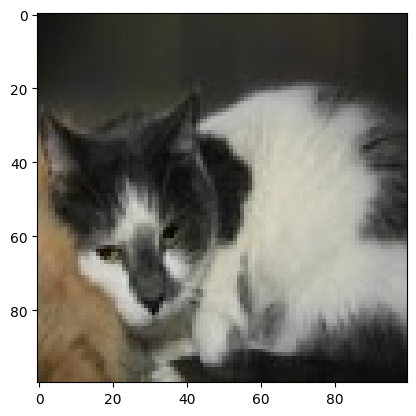

In [13]:
# ploting random images from training data
show_img(x_train,y_train)




This is the image of Cat


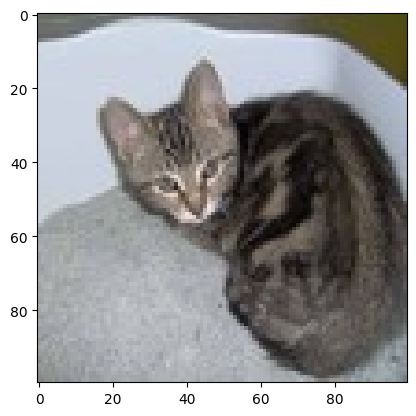

In [14]:
# ploting random images from Testing data
show_img(x_test,y_test)

# **Lets build the CNN architecture **

In [15]:
# initialize the model
#model=Sequential

# First Convolution layer
#model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
#model.add(MaxPooling2D((2,2)))

# second covolution layer
#model.add(Conv2D(32,(3,3),activation="relu"))
#model.add(MaxPooling2D((2,2)))

# Flattening layer
#model.add(Flatten())

# Fully connected layers

#First Dense Layer
#model.add(Dense(70, activation="relu"))

#Output layer
#model.add(dense(1,activation="sigmoid"))



In [20]:
# Conventional way of building an Architecture
model=Sequential([
    # First Convolution layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    # second covolution layer
     Conv2D(32,(3,3),activation="relu"),
     MaxPooling2D((2,2)),

    # Flattening layer
    Flatten(),

    # Fully connected layers
    # First Dense Layer
    Dense(70, activation="relu"),

    # Output layer
    Dense(1,activation="sigmoid")])


# compiling the model

model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])



In [22]:
# Training the model
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 1s 25ms/step - loss: 0.1213 - accuracy: 0.9581 - val_loss: 1.6493 - val_accuracy: 0.5275
Epoch 2/10
50/50 [==============================] - 1s 16ms/step - loss: 0.0832 - accuracy: 0.9775 - val_loss: 2.3173 - val_accuracy: 0.4625
Epoch 3/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9862 - val_loss: 1.8400 - val_accuracy: 0.5700
Epoch 4/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 1.9279 - val_accuracy: 0.5850
Epoch 5/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0246 - accuracy: 0.9956 - val_loss: 1.8727 - val_accuracy: 0.5825
Epoch 6/10
50/50 [==============================] - 1s 16ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 2.4091 - val_accuracy: 0.5475
Epoch 7/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 2.5785 - val_accuracy: 0.5400
Epoch 8/10
50

*There is huge difference between the training accuracy and validation accuracy, this means the model is over fitting*

In [24]:
#Evaluate the model
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 7ms/step - loss: 2.0808 - accuracy: 0.6400


[2.080810546875, 0.6399999856948853]

*The testing accuracy is 64% while the trainig accuracy was 100% ( which itself seems to be a red flag), and  there is huge diffrence between the training and testing accuracy, which again highights that the model is overfitting.*

*Still, Let's check the model*


The actual image is of a Dog
1/1 [==============================] - 0s 17ms/step

Predicted image is of a Dog


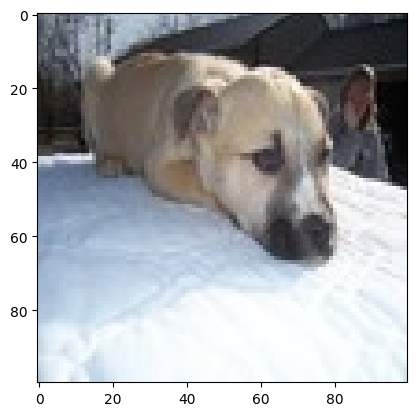

In [35]:
  import random
# Actual Testing image

  img_no=random.randint(0,len(y_test))
  plt.imshow(x_test[img_no])
  print()
  if y_test[img_no]==0:
    print("The actual image is of a Dog")
  else:
    print("The actual image is of a Cat")

# prediction for the above image
  y_pred=model.predict(x_test[img_no].reshape(1,100,100,3))
  print()
  if y_pred<0.5:
    print("Predicted image is of a Dog")
  else:
    print("The predicted image is of a Cat")

In [37]:
ypred=model.predict(x_test)
ypred=ypred>0.5

13/13 [==============================] - 0s 5ms/step


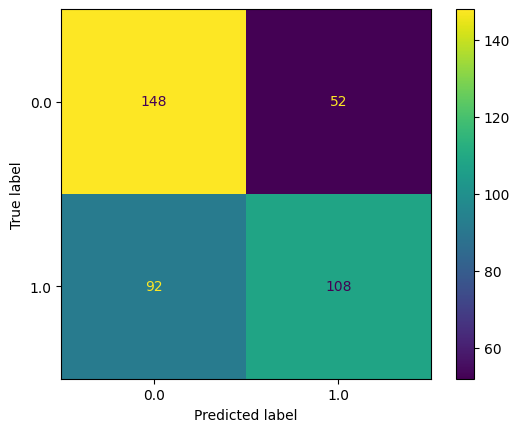

In [40]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,precision_score, recall_score, f1_score
conf=ConfusionMatrixDisplay.from_predictions(y_test,ypred)

In [51]:
#Lets check other matrics  such as precision, recall, f1-score


precision = precision_score(y_test, ypred).round(2)*100
recall = recall_score(y_test, ypred)*100
f1 = f1_score(y_test, ypred).round(3)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 68.0
Recall: 54.0
F1 Score: 0.6
